# Project Description: Twitter US Airline Sentiment

# Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Dataset:

The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment 

The dataset has to be downloaded from the above Kaggle website.

The dataset has the following columns:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

# Objective:

To implement the techniques learnt as a part of the course.

# Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    * Bag of words
    * Tf-idf
- Build the classification model.
- Evaluate the Model.

## Deliverable – 1: Import the libraries, load dataset, print shape of data, data description. 
## (5 Marks)

<font color='brown'><b>1.1 Import necessary Python Libraries</b></font>

In [1]:
# Import all essential python libraries

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import contractions
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import numpy as np  # import Numpy
import pandas as pd  #import Pandas
import matplotlib.pyplot as plt # import Matplotlib
import seaborn as sns # import Seaborn
sns.set(color_codes = True) # set the background of the visualization graph
%matplotlib inline
import re, string, unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khimy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khimy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khimy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<font color='brown'><b>1.2 Load dataset</b></font>

In [2]:
# read the dataset into a dataframe 
dfTweets = pd.read_csv('Tweets.csv')

<font color='brown'><b>1.3 General characteristic of the dataset</b></font>

In [3]:
# read the first 5 rows of the dataset
dfTweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# find the rows and columns of the dataframe
print(dfTweets.shape) # there are 14640 rows and 15 columns

(14640, 15)


In [5]:
# names of columns of the dataset
col = dfTweets.columns
col

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
# information of the dataset with regards to columns, count and datatype
dfTweets.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


<font color='brown'><b>1.4 Data Description</b></font>

In [7]:
# check the missing values/null in the dataset
dfTweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
# find null values in the dataset
dfTweets['text'].isna().any()

False

In [9]:
# find unique sentiment values
dfTweets['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [10]:
# find negative sentiment reason
dfTweets['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [11]:
# check the value count of each sentiment in the dataset
dfTweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

<font color='red'><b>The dataset has class imbalance with majority of the sentiments pertaining to negative sentiment</b>

In [12]:
# finding out if the dataset is balanced or imbalanced

dfTweets['airline_sentiment'].value_counts(normalize=True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [13]:
# describe the summary of the dataframe
dfTweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


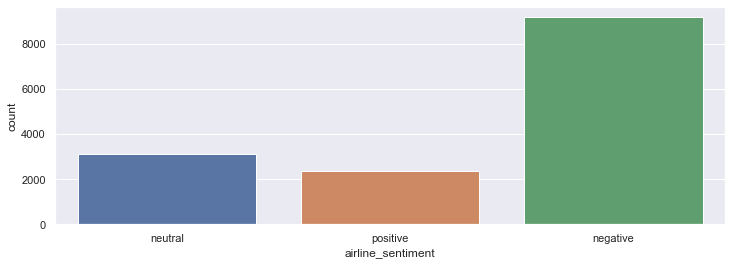

In [14]:
# plot the count of the sentiments in the dataset
plt.figure(figsize=(12,4))
sns.countplot(dfTweets['airline_sentiment'])
plt.show();

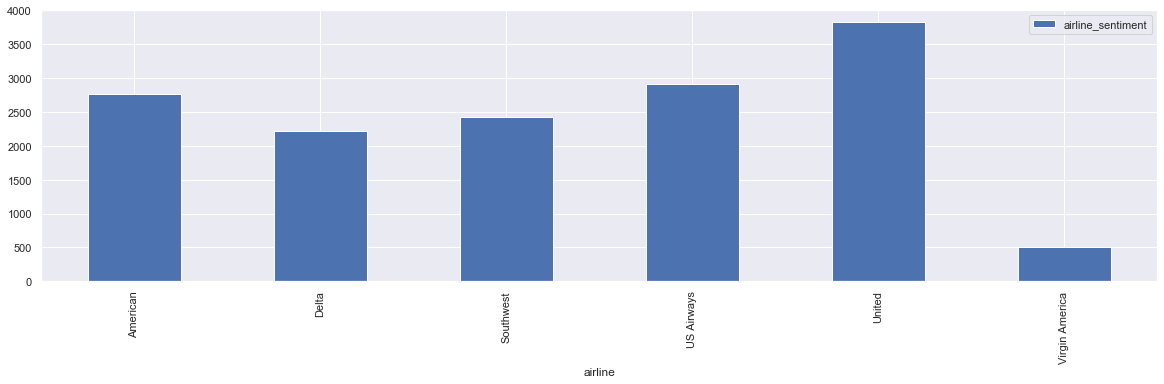

In [15]:
# count of sentiments grouped by airlines

dfTweets.groupby(by=['airline'])['airline_sentiment'].count().reset_index().plot(x='airline',
                                                                             y='airline_sentiment',
                                                                             kind='bar',
                                                                            figsize=(20,5));
plt.show()

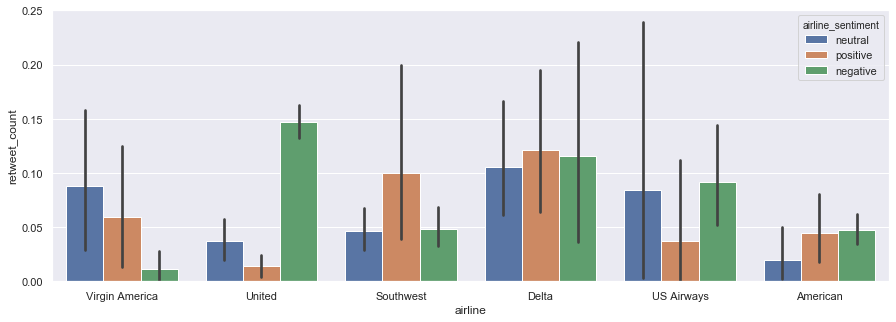

In [16]:
# plot retweets of sentiments for airlines based on airline sentiments
plt.figure(figsize=(15,5))
sns.barplot(x='airline',y='retweet_count',data=dfTweets,hue='airline_sentiment');

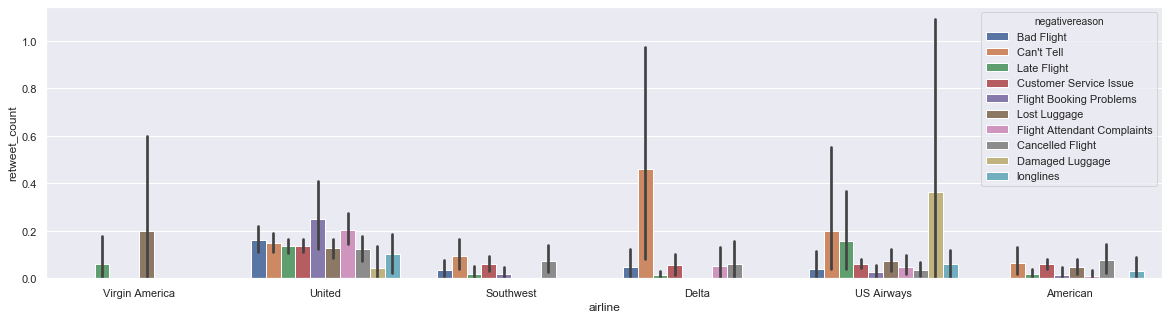

In [17]:
# plot retweets of sentiments for airlines based on negative sentiment reasons
plt.figure(figsize=(20,5))
sns.barplot(x='airline',y='retweet_count',data=dfTweets,hue='negativereason');

## Deliverable - 2: Understand of data-columns: (5 Marks)

<font color='brown'><b>2.1 Drop all other columns except “text” and “airline_sentiment”</b></font>

In [18]:
# dropping all the columns of the dataset except for text and airline_sentiment
dfTweets_1 = dfTweets.drop(['tweet_id','airline_sentiment_confidence','negativereason', 
                            'negativereason_confidence', 'airline','airline_sentiment_gold', 
                            'name', 'negativereason_gold','retweet_count','tweet_coord', 
                            'tweet_created','tweet_location','user_timezone'],axis=1) 


<font color='brown'><b>2.2 Check the shape of data</b></font>

In [19]:
# shape of the resulting dataframe
dfTweets_1.shape

(14640, 2)

<font color='brown'><b>2.3 Print first 5 rows of data</b></font>

In [20]:
# first 5 rows of the dataset
dfTweets_1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [21]:
# display the entire column text
pd.set_option('display.max_colwidth',None)
dfTweets_1.head()

ValueError: Value must have type '<class 'int'>'

# Deliverable - 3: Text pre-processing: Data preparation. (20 Marks)

<font color='brown'><b>3.1 Website URLs and HTML tag removal.</b></font>

In [22]:
# remove website urls from the data using regular expression
for i, row in dfTweets_1.iterrows():
    remove_http = re.sub(r'http\S+','',dfTweets_1.at[i,'text'])
    dfTweets_1.at[i,'text'] = remove_http

In [23]:
# remove html tags using beautifulsoup package
def strip_html_tags(text):
    tags_removal = BeautifulSoup(text,'html.parser')
    stripped_text = tags_removal.get_text()
    return stripped_text # returns text without html tags

dfTweets_1['text'] = dfTweets_1['text'].apply(lambda x: strip_html_tags(x))
dfTweets_1.head()    

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [24]:
# check that html tags and website URLs are removed
print(dfTweets['text'].iloc[172])
print()
print(dfTweets_1['text'].iloc[172])

@VirginAmerica to begin Dallas-Austin #flights in April - 88.9 KETR http://t.co/SSUVWwkyHH

@VirginAmerica to begin Dallas-Austin #flights in April - 88.9 KETR 


<font color='brown'><b>3.2 remove emails in the text string.</b></font>

In [25]:
# remove emails from the text string
for i, row in dfTweets_1.iterrows():
    remove_email = re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]{2,4}','',dfTweets_1.at[i,'text'])
    dfTweets_1.at[i,'text'] = remove_email

In [26]:
# check that emails are removed
print(dfTweets['text'].iloc[13204])
print()
print(dfTweets_1['text'].iloc[13204])

@AmericanAir and feel free to email me mikehertz7@gmail.com - don't worry, we're not going anywhere but this damn Tarmac for a bit!

@AmericanAir and feel free to email me  - don't worry, we're not going anywhere but this damn Tarmac for a bit!


<font color='brown'><b>3.3 Replace Contractions</b></font>

In [23]:
# function to remove contractions
def replace_contractions(text):
    return contractions.fix(text) # remove contractions in strings of text

dfTweets_1['text'] = dfTweets_1['text'].apply(lambda x: replace_contractions(x))
dfTweets_1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


<font color='brown'><b>3.4 Remove the numbers.</b></font>

In [24]:
# function to remove numbers
def remove_numbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

dfTweets_1['text'] = dfTweets_1['text'].apply(lambda x: remove_numbers(x))
dfTweets_1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


<font color='brown'><b>3.5 Tokenization</b></font>

In [25]:
# tokenization of dataset
dfTweets_1['text'] = dfTweets_1.apply(lambda x: nltk.word_tokenize(x['text']), axis=1)
dfTweets_1.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


<font color='brown'><b>3.6 compile list of custom stop words.</b></font>

In [26]:
# complete list of default stop words
stopwords = stopwords.words('english')

# list of stop words to be removed from the default stop words
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))    

<font color='brown'><b>3.7 Remove accented/non-ascii text.</b></font>

In [27]:
# function to remove accented characters in the string
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word) # Append processed words to new list.
    return new_words

<font color='brown'><b>3.8 convert to lower character.</b></font>

In [28]:
# function to convert to lower characters
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []       # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()
        new_words.append(new_word) # Append processed words to new list.
    return new_words

<font color='brown'><b>3.9 Removal of Special Characters and Punctuations.</b></font>

In [29]:
# function to remove punctuations and special characters
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []     # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word) # Append processed words to new list.
    return new_words

<font color='brown'><b>3.10 Removal of stop words.</b></font>

In [30]:
# function to remove stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []      # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word) # Append processed words to new list.
    return new_words

<font color='brown'><b>3.11 Lemmatize or stemming.</b></font>

In [31]:
# function for lemmatization of the text
def lemmatize_list(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    new_words = []      # Create empty list to store pre-processed words.
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))  # Append processed words to new list.
    return new_words

<font color='brown'><b>3.12 Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)</b></font>

In [32]:
# consolidated function for text processing
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

dfTweets_1['text'] = dfTweets_1.apply(lambda row: normalize(row['text']), axis=1)


<font color='brown'><b>3.13 Print first 5 rows of data after pre-processing.</b></font>

In [33]:
# print the first 5 rows after pre-processing
dfTweets_1.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [34]:
# shape of dataset after pre-processing
dfTweets_1.shape

(14640, 2)

# Deliverable - 4: Vectorization: (10 Marks)

<font color='brown'><b>4.1 Use CountVectorizer.</b></font>

In [138]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2000) # Keep only 2000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(dfTweets_1['text'])

data_features = data_features.toarray() # Convert the data features to array.
data_features.shape

(14640, 2000)

In [139]:
# print the features created from count vectorizer
print(data_features)
print()
print()
print(data_features.dtype) # check that count vectorizer produces datatype as int

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


int64


<font color='brown'><b>4.2 Use TfidfVectorizer.</b></font>

In [140]:
# Use TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2000)
tfidf_data_features = vectorizer.fit_transform(dfTweets_1['text'])

tfidf_data_features = tfidf_data_features.toarray()

tfidf_data_features.shape

(14640, 2000)

In [141]:
# print the features created from count vectorizer
print(tfidf_data_features)
print()
print()
print(tfidf_data_features.dtype)# check that count vectorizer produces datatype as float

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


float64


# Deliverable - 5: Fit and evaluate model using both type of vectorization. (6+6 Marks)

<font color='brown'><b>5.1 Split dataset into training and testing.</b></font>

In [54]:
# replace categorical value of airline sentiments into numericals by creating a dictionary
label_dict = {'negative':0,
              'neutral':1,
              'positive':2,
              }

In [55]:
# replace the categorical values of label to numerical
dfTweets_1['airline_sentiment'] = dfTweets_1['airline_sentiment'].replace(label_dict)
dfTweets_1.head()

,airline_sentiment,text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience tacky
2,1,virginamerica not today must mean need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,0,virginamerica really big bad thing


In [56]:
# assign labels (y) as dependent variable airline sentiment
labels = dfTweets_1['airline_sentiment']
labels = labels.astype('int')

<font color='brown'><b>5.1.1 Split dataset for count vectorizer process.</b></font>

In [57]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_features, labels, 
                                                            test_size=0.3, 
                                                            random_state=42)

In [59]:
# find the shape of resulting datasets
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((10248, 2000), (4392, 2000), (10248,), (4392,))

<font color='brown'><b>5.1.2 Split dataset for TF-IDF vectorizer process.</b></font>

In [58]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(tfidf_data_features, labels, 
                                                            test_size=0.3, 
                                                            random_state=42)

In [60]:
# find the shape of resulting datasets
X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((10248, 2000), (4392, 2000), (10248,), (4392,))

<font color='brown'><b>5.2 Finding the best ML model for the dataset.</b></font>

In [84]:
# train the data with various classification algorithms
model = []         # empty list for models
train_score = []   # empty list for training score
test_score = []    # empty list for testing score

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

mdls = [RandomForestClassifier(random_state=7),
        BaggingClassifier(random_state=7),
        AdaBoostClassifier(random_state=7),
        GradientBoostingClassifier(random_state=7)]

names = ['RandomForest Classifier', 'Bagging Classifier','Adaboost Classifier', 'Gradientboost Classifier']

for i,v in enumerate(mdls):
    pipeline = Pipeline([
                    ('Classification Model', v)
                    ])
    pipeline.fit(X_train_1,y_train_1)
    model.append(names[i])
    train_score.append(cross_val_score(pipeline,X_train_1,y_train_1,cv=10).mean())
    test_score.append(cross_val_score(pipeline,X_test_1,y_test_1,cv=10).mean())

<font color='brown'><b>5.3 Performance score of various models.</b></font>

In [85]:
# capture the score in a dataframe for comparison
results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = train_score
results['Testing Score'] = test_score
results = results.set_index('Model')
results

,Training Score,Testing Score
Model,,
RandomForest Classifier,0.755464,0.757289
Bagging Classifier,0.722969,0.723591
Adaboost Classifier,0.726676,0.735667
Gradientboost Classifier,0.742973,0.753192


<font color='brown'><b>5.4 Hyberparameter tuning for the best model.</b></font>

<font color='blue'><b>Since the best results are produced by the Random Forest classifier, we shall do hypertuning of parameters on this algorithm</b><font>

In [126]:
# hypertune the parameters using grid search
from sklearn.model_selection import GridSearchCV
rfcl_tuned = RandomForestClassifier(random_state=7)

params = {
         'bootstrap': [True,False],
          'max_depth': [3,4,None],
          'max_features':['auto', 'sqrt', 'log2'],
          'min_samples_leaf':[1,3,4],
          'min_samples_split':[2,3,5],
          'n_estimators': [10,15,25,50]
}

grid = GridSearchCV(estimator=rfcl_tuned, param_grid=params, cv= 10)

grid.fit(X_train_1,y_train_1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=7),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 15, 25, 50]})

In [127]:
# find the best parameters for the randomforest classifier model
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=50, random_state=7)

<font color='brown'><b>5.5 Fit for CountVectorize.</b></font>

In [128]:
# use Random Forest to build model for the classification of sentiments.
# also calculate the cross validation score.
rfc = RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=50, random_state=7)

rfc = rfc.fit(X_train_1, y_train_1)

print(rfc)

print(np.mean(cross_val_score(rfc, X_train_1, y_train_1, cv=10)))

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=50, random_state=7)
0.765905106707317


<font color='brown'><b>5.6 Evaluate for CountVectorize.</b></font>

In [163]:
# predict the results
predict = rfc.predict(X_test_1)
print(predict)
print()
print(rfc.score(X_test_1,y_test_1))

[2 0 0 ... 0 0 0]

0.7864298724954463


<font color='brown'><b>5.7 Fit for TfidfVectorizer.</b></font>

In [131]:
# use Random Forest to build model for the classification of sentiments.
# also calculate the cross validation score.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

rfcl_tfidf = RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=50, random_state=7)

rfcl_tfidf = rfcl_tfidf.fit(X_train_2, y_train_2)

print(rfcl_tfidf)

print(np.mean(cross_val_score(rfcl_tfidf, X_train_2, y_train_2, cv=10)))

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=3, n_estimators=50, random_state=7)
0.765905106707317


<font color='brown'><b>5.8 Evaluate for TfidfVectorize.</b></font>

In [132]:
# Predict the result for test data using the model built above.

print(rfcl_tfidf.score(X_test_2,y_test_2))
print()
predict_tfidf = rfcl_tfidf.predict(X_test_2)
print(predict_tfidf)

0.7864298724954463

[2 0 0 ... 0 0 0]


# Deliverable - 6: Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

<font color='brown'><b>6.1 Summary of various pre-processing.</b></font>

<font color='blue'>
<b>Unstructured text contains a lot of noise. Text pre-processing helps us in cleaning up the noise in the text and ensuring that clean data is fed to the ML algorithm. In machine learning, prediction/output is dependent on input (Garbage in - Garbage out).</b>
<br>
<br>
1) HTML tags and website URLs were removed from the data. This is an essential step in cleaning up the data and ensuring that the text is clean enough to pass through the ML algorithm. HTML tags was removed by using a method in BeautifulSoup package and URLs were removed by using substitute method in regular expression
<br>
    
2) The text also contains emails which were removed to ensure cleaner text. The emails were removed using the method substitute in Python's regular expression. 
<br>
    
3) Replacing contractions in text with their expanded version helps in text standardization. A function was defined to expand the contractions in the dataset. This was done by importing the contraction package.
<br>
    
4) Numbers don't add any meaning or value to the text analysis. Hence, they are removed in text preprocessing by using regular expression's substitute method.   
<br>
    
5) Tokenization helps in breaking the text into individual tokens which can then be used for removing the stop words. The word tokenizer from Natural Language took kit (NLTK) was used.
<br>
    
6) As we want to analyze English text, we have converted the accented and non-ascii characters to ascii characters by using unicodedata package. 
<br>

7) The NLP process will consider the same words starting with Upper character and Lower character as two different words hence increasing the number of feature in the dataset. Hence, we have converted the words to lower characters. The 'LOWER' function in Python was used. 
<br>

8) Stop words are common words that carry less importance than the key words and add unnecessary dimensionality to the dataset. The standard English stopword list can't be used directly on the current dataset as it will remove negative sentiments from the text. So a custom list is compiled by retaining words like not, wouldn't, couldn't etc. to evaluate the negative sentiments in the dataset. 
<br>

9) Special characters and punctuations add noise to the dataset. Hence a function was defined to remove special characters and punctuations. The substitute method in Python's regular express was used to remove these characters. 
<br>

10) We don't want different inflection forms of the words to be treated as different columns when we convert our unstructured dataset to structured text data. Lemmatization is a dimensionality reduction process used to convert the words to their root words or lemma. Of the different Lemmatizers available, the WordNetLematizer was used in this project. Lemmatization also serves as a dimensionality reduction method. 
<br>
    
11) Once all the preprocessing is done then the words have to be joined back so that they can be fed into the machine learning model for sentiment analysis. 

<font color='brown'><b>6.2 Summary of vecorization.</b></font>

<font color='blue'>
<b>Text can't be fed into the machine learning model directly. The text has to be converted into numbers(arrays). Vectorization uses the process called bag of words to achieve this. Bag of words can be considered as a feature extraction method.</b>
<br>
<br>
1) Count vectorizer was applied on the dataset which simply counts the number of times each word appears on the dataset and arranges the words in alphabetic order. One of the disadvantage of using word vectorizer is that it gives equal importance to all the words present in the Corpus.
<br>

2) TF-IDF vectorizer was applied on the dataset which has an advantage of providing less weightage to words that appear more frequently in the corpus. 
<br>
    
3) The max. features of both word vectorizer and TF-IDF vectorizer was kept at 2000 as it may not be efficient to transform the entire vocabulary available in the corpus, as the data may have some exceptionally rare words. These words when passed through the vectorizer may add unwanted dimensions to the inputs. To avoid this, we are restricting the max_features to 2000 which provided the optimum performance score. 
<br>
    
4) Passing the arrays created from both count vectorizer and TF-IDF vectorizer through the model shows that, the model produces same performance results for CoutVectorizer and TF-IDFVectorizer for the training set and the testing set. 

<font color='brown'><b>6.3 Summary of Model performance.</b></font>

<font color='blue'>
1) The dataset was trained using various algorithms like randomeforest classifier, bagging classifier, adaboost classifier and gradientboost classifier. 
<br>

2) The RandomForest Classifier produces the best results for the dataset. 
<br>
 
3) The best model has an accuracy score of 78.6% on the test data
<br>


<font color='brown'><b>6.4 Confusion Matrix.</b></font>

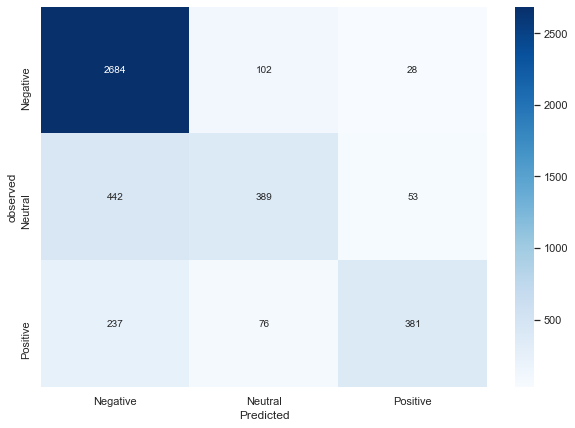

In [146]:
# import confusion_matrix and classification_report from sci-kit learn
from sklearn.metrics import confusion_matrix, classification_report

label = ['Negative','Neutral','Positive'] # labels for the sentiments
conf_mat = confusion_matrix(y_test_2, predict_tfidf) # confusion matrix

df_cm = pd.DataFrame(conf_mat, index = [i for i in label],
                  columns = [i for i in label]) # create dataframe for confusion matrix
# plot heatmap for confusion matrix
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,cmap ='Blues', annot=True, fmt='g')
plt.ylabel('observed')
plt.xlabel('Predicted')
plt.show()

<font color='brown'><b>6.5 Classification report and interpretation of confusion matrix .</b></font>

In [143]:
# confusion matrix 
conf_mat

array([[2684,  102,   28],
       [ 442,  389,   53],
       [ 237,   76,  381]])

In [145]:
# classification report
print(classification_report(new_y_test,new_y_pred))

              precision    recall  f1-score   support

    Negative       0.79      0.93      0.85      2814
     Neutral       0.57      0.40      0.47       884
    Positive       0.76      0.52      0.62       694

    accuracy                           0.76      4392
   macro avg       0.71      0.61      0.65      4392
weighted avg       0.74      0.76      0.74      4392



### <font color='red'> interpretation of confusion matrix for various classes

<font color='blue'><b><u>Negative</u></b>
<br>
TP = 2684
<br>
FP = 442 + 237 = 679
<br>
FN = 102 + 28 = 130
<br>
TN = 389 + 53 + 76 + 381 = 899
<br>
<br>
<font color='blue'><b><u>Neutral</u></b>
<br>
TP = 389
<br>
FP = 102 + 76 = 178
<br>
FN = 442 + 53 = 495
<br>
TN = 2684 + 28 + 237 + 381 = 3330
<br>
<br>
<font color='blue'><b><u>Positive</u></b>
<br>
TP = 381
<br>
FP = 53 + 28 = 81
<br>
FN = 237 + 76 = 313
<br>
TN = 2684 + 102 + 442 + 389 = 3617

<font color='brown'><b>6.6 Interpretation of prediction and conclusion.</b></font>

In [153]:
# capture the predictions in a dataframe
predictions = pd.DataFrame(predict_tfidf)

In [159]:
# replace the numerical labels to categorical in the predictions
decode_label_dict = {0:'Negative',
                     1:'Neutral',
                     2:'Positive'
                    }
# rename column to Label
predictions.rename(columns={0:'Label'},inplace=True)

# replace the categorical labels with numerical values
predictions = predictions.replace(decode_label_dict)

In [161]:
# finding out the percentage of labels in predictions
predictions['Label'].value_counts(normalize=True)*100

Negative    76.571038
Neutral     12.909836
Positive    10.519126
Name: Label, dtype: float64

<font color='blue'>
1) The predictions were 14% higher for the negative sentiment compared to the % in the actual dataset.
<br>
  
2) The predictions were 9% lower for the neutral sentiment compared to the % in the actual dataset
<br>
    
3) The predictions were 6% lower for the positive sentiment compared to the % in the actual dataset
<br>
    
4) The dataset being a imbalance dataset resulted in bias in prediction towards the majority class which is the Negative sentiment in this dataset. 
<br>
    
5) The classes predictions implies that there is a general negative sentiment towards the airline industry compared to positive or neutral sentiment indicating that the airline industry needs to improve its services. 